### Helpers

In [1]:
#Packages for NLP
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import pandas as pd
import pickle
import re
import matplotlib.pyplot as plt
import random
from textblob import TextBlob
from langdetect import detect

In [2]:
#Define stopwords
punctuation = "".join([symbol for symbol in string.punctuation if symbol not in ["'", '"']])
punctuation += '–'

stopwords_list = stopwords.words('english')
stopwords_list += list(punctuation)

In [ ]:
stopwords_list

In [3]:
#Create a function to remove verse and chorus inside brackets
#remove \n and lower all texts
def clean_lyric(song):
    pattern = '\[.*?\]'
    p = re.compile(pattern)
    bit_clean = p.sub("",song.replace('\n', ' '))
    return bit_clean.translate(str.maketrans('', '', punctuation)).replace('\u200b', " ").strip().lower()

In [4]:
#pickle pickle
def save_df():
    with open('../Data-Cleaning/working_data.pkl', 'wb') as file:
        pickle.dump(tracks_df, file)

## Getting the DF ready

In [5]:
#Load in a Dataframe all lyrics and artist names
tracks_df = pd.read_pickle('../Data-Cleaning/full_data.pkl')
tracks_df.shape

(55010, 27)

In [6]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55010 entries, 0 to 55009
Data columns (total 27 columns):
Artist              55010 non-null object
Title               55010 non-null object
Album               41294 non-null object
Year                36741 non-null object
Lyrics              55007 non-null object
name                28370 non-null object
duration_ms         28370 non-null object
popularity          28370 non-null object
num_markets         28370 non-null object
album               28370 non-null object
disc_number         28370 non-null object
is_explicit         28370 non-null object
track_number        28370 non-null object
release_date        28370 non-null object
artist              28370 non-null object
danceability        28370 non-null float64
energy              28370 non-null float64
key                 28370 non-null object
loudness            28370 non-null float64
mode                28370 non-null object
speechiness         28370 non-null float64
acous

In [7]:
#Create a column for the year of the song release
tracks_df['Year_release'] = tracks_df.Year.apply(lambda x: x[:4] if isinstance(x, str) else None)

In [8]:
tracks_df.head()

,Artist,Title,Album,Year,Lyrics,name,duration_ms,popularity,num_markets,album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year_release
0,Frank Ocean,Trouble,None,2012-01-01,"Go, go, go\n\n[Verse 1]\nForbidden from the be...",None,None,None,None,None,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,2012
1,DJ Jazzy Jeff & The Fresh Prince,Time to Chill,"He’s The DJ, I’m The Rapper",1988-03-29,[Fresh Prince]\nFor years I have been waitin a...,Time to Chill,266040,24,79,"He's The DJ, I'm The Rapper",...,-16.289,1,0.161,0.00172,0.00002,0.0648,0.887,170.385,4,1988
2,Eminem,Walk On Water/Stan/Love The Way You Lie (SNL M...,None,2017-11-18,Walk On Water\n\n[Chorus: Skylar Grey]\nI walk...,None,None,None,None,None,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,2017
3,Machine Gun Kelly,Candy,Hotel Diablo,2019-07-05,"[Intro: Trippie Redd]\nHaha, Big 14, you know ...",Candy (feat. Trippie Redd),156719,78,79,Hotel Diablo,...,-4.860,0,0.049,0.00829,0.00000,0.1820,0.480,98.019,4,2019
4,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...,You Ain't a Killer,254866,57,79,Capital Punishment (Explicit Version),...,-7.076,1,0.393,0.13400,0.00000,0.1120,0.745,90.945,4,1998


In [9]:
#Check my lyrics
tracks_df.Lyrics

0        Go, go, go\n\n[Verse 1]\nForbidden from the be...
1        [Fresh Prince]\nFor years I have been waitin a...
2        Walk On Water\n\n[Chorus: Skylar Grey]\nI walk...
3        [Intro: Trippie Redd]\nHaha, Big 14, you know ...
4        [Verse 1]\nThe harsh realities of life have ta...
                               ...                        
55005    Benevolence, mercy, discipline...\nBenevolence...
55006    [Intro: FXXXXY]\nBlood, blood, blood\nXanax dr...
55007    [Hook]\nDope game cocaine\nDope game dope dope...
55008    [Verse 1: Billy Danze]\nUh\nFrom the glitzed t...
55009    [Produced by Beats Billionaire]\n\n[Intro: 2Pa...
Name: Lyrics, Length: 55010, dtype: object

In [10]:
#Droping rows without lyrics and without data from spotify
tracks_df.dropna(subset = ['Lyrics','speechiness'],inplace = True)

In [12]:
#Number of songs left
len(tracks_df)

28367

In [13]:
tracks_df['Artist'].value_counts().head(50)

K-Rino               459
E-40                 429
Gucci Mane           405
Tech N9ne            404
Chief Keef           337
Snoop Dogg           336
B.o.B                295
Waka Flocka Flame    289
Boosie Badazz        281
The Game             276
Chamillionaire       265
Wiley                258
Future               257
Nas                  248
T.I.                 241
J Dilla              238
Too $hort            238
Curren$y             232
Jeezy                229
Wiz Khalifa          228
Atmosphere           226
Kool Keith           222
Three 6 Mafia        216
Slim Thug            215
Cypress Hill         210
Drake                206
Pitbull              204
Ace Hood             199
Rick Ross            194
Eminem               192
Tyga                 192
Kevin Gates          191
2Pac                 191
Wyclef Jean          185
Migos                183
Ghostface Killah     182
The Alchemist        179
Project Pat          178
Canibus              178
Lil Durk             178


## Cleaning Lyrics

In [14]:
#checking the output of my cleaning function / testing
clean_lyric(tracks_df.Lyrics[4])

"the harsh realities of life have taken toll even jesus christ forsake my soul please tell me what price to pay to make it whole take control i'm makin' dough but not enough to blow jo's they lust my flows but ayo i don't trust a soul that's all i know or need to these evil streets'll meet you halfway and eat you alive tryin' to survive illegal i'll leave you lost mount you on a cross whip you like a horse sacrifice your life to a higher force then i'll stomp your corpse it's the bronx of course recognize the accent one of the last livin' stillinaction general assassins catchin' any wreck blastin' any tec smashin' any chest passin' any test charles manson in the flesh any last requests before you meet your maker sow what you reap or wake up shakin' up a storm like anita baker i'll take you straight to hell and fill your heart with hate incarcerate your fate in satan's fiery lake then i lock the gate make no mistake this shit as real as joe we follow the killer's code when we come for y

In [ ]:
# tokenizeText(test)

In [15]:
#cleaning my lyrics
tracks_df['Cleaned_lyrics']= tracks_df.Lyrics.apply(lambda x:clean_lyric(x))

In [16]:
tracks_df['Lyrics'] = tracks_df.Lyrics.apply(lambda x: x if x != '1' else None)

In [17]:
tracks_df.Lyrics.isna().sum()

2

In [18]:
#further deletion of missing Lyrics
tracks_df.dropna(subset = ['Lyrics'],inplace = True)

In [19]:
len(tracks_df)

28365

In [20]:
#Create a column with all the words for each lyrics
tracks_df['Lyric_words']= tracks_df.Cleaned_lyrics.apply(lambda x: word_tokenize(x))

In [21]:
#Find out that some lyrics are not in English
tracks_df.Lyrics[51248]

'그때 나를 다시 기억해\n메마른 땅이 날 불태울 때\n저 푸른 하늘 보며 뛰었네\n날고 싶었어 그 Airplane에서\n\n그때 나를 다시 기억해\n메마른 땅이 날 불태울 때\n저 푸른 하늘 보며 뛰었네\n날고 싶었어 그 Airplane Airplane\n\n아직도 난 안 믿겨\n광주 토박이의 비행 삼매경\n높고 높았던 꿈의 자리에서\n아름다운 세상 위를 날고 있어\n늘 탈 때\n첫 일본 행 때의 느낀 설렘\n아직도 생각해\n그게 내 꿈을 띄웠기에\n지금을 만들었기에\nEverywhere\n이젠 Issue Man 플래시 터질 때\n안전한 도착에 축복을 담을게\nGod Bless\n\n그때 나를 다시 기억해\n메마른 땅이 날 불태울 때\n저 푸른 하늘 보며 뛰었네\n이젠 원 없이 날아 Airplane 에서\n\n누군가는 나를 개 욕해\n그 누군가들 질투도 외롭게 해\n신경 안 써 그저 웃게 돼\nDrink Champagne in my Airplane\n\n구름 위를 매일\n구름 위를 매일\n구름 위에 내 Feel\n구름 위에 Check it\n구름과의 케미\n구름과 하루 종일\n구름 타는 재미, 구름 보며 Fade in, 너흰 몰라 Maybe\n몇 년 동안의 비행 탓에\n마일리지만 몇 십만 때\n못 이룬 너희들을 위로해줄 때야\n그 비행 포인트로 선물 할게\nLove 에어플레인 모드\n신경은 다 Off, 그 누구든지 뭐라 하든\n그저 계속 퍼스트를 지키며\n밤 하늘을 볼게\n지금 내 자리에 맞춰\n\n그때 나를 다시 기억해\n메마른 땅이 날 불태울 때\n저 푸른 하늘 보며 뛰었네\n그때를 생각해 이 Airplane에서\n\n누군가는 나를 개 욕해\n그 누군가들 질투도 외롭게 해\n신경 안 써 그저 행복해\n성공을 느껴 In my Airplane'

In [22]:
#Create a new column for the language of the lyrics
tracks_df['Language'] = tracks_df.Cleaned_lyrics.apply(lambda x: detect(x) if len(x)>0 else 'n/a')

In [23]:
tracks_df.head()

,Artist,Title,Album,Year,Lyrics,name,duration_ms,popularity,num_markets,album,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year_release,Cleaned_lyrics,Lyric_words,Language
1,DJ Jazzy Jeff & The Fresh Prince,Time to Chill,"He’s The DJ, I’m The Rapper",1988-03-29,[Fresh Prince]\nFor years I have been waitin a...,Time to Chill,266040,24,79,"He's The DJ, I'm The Rapper",...,0.00172,0.000020,0.0648,0.887,170.385,4,1988,for years i have been waitin and hesitatin to ...,"[for, years, i, have, been, waitin, and, hesit...",en
3,Machine Gun Kelly,Candy,Hotel Diablo,2019-07-05,"[Intro: Trippie Redd]\nHaha, Big 14, you know ...",Candy (feat. Trippie Redd),156719,78,79,Hotel Diablo,...,0.00829,0.000000,0.1820,0.480,98.019,4,2019,haha big 14 you know what the fuck going on ...,"[haha, big, 14, you, know, what, the, fuck, go...",en
4,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...,You Ain't a Killer,254866,57,79,Capital Punishment (Explicit Version),...,0.13400,0.000000,0.1120,0.745,90.945,4,1998,the harsh realities of life have taken toll ev...,"[the, harsh, realities, of, life, have, taken,...",en
6,Das EFX,Buck-Buck,Hold It Down,1995-09-26,*Skoob and Dray giving shoutouts*\n\nChorus:\n...,Buck-Buck,193626,22,78,Hold It Down,...,0.29300,0.000000,0.2950,0.531,95.677,4,1995,skoob and dray giving shoutouts chorus well ...,"[skoob, and, dray, giving, shoutouts, chorus, ...",en
9,Kool Moe Dee,To the Beat Y’all,Funke Funke Wisdom,1991-06-11,To the beat...\n\n(To the beat y'all\nTo the b...,To The Beat Y'All,201266,11,77,"Funke, Funke Wisdom",...,0.01930,0.000107,0.3950,0.578,108.597,4,1991,to the beat to the beat y'all to the beat y'a...,"[to, the, beat, to, the, beat, y'all, to, the,...",en


In [24]:
#checking different languanges
tracks_df.Language.value_counts()

en     27514
n/a      473
fr       107
tr        88
es        86
ro        15
cy        10
so         8
tl         7
af         6
nl         6
id         6
it         5
sl         3
ca         3
pl         3
pt         3
hr         3
ko         2
sv         2
sq         2
sw         2
et         2
de         2
da         2
fi         1
no         1
ru         1
cs         1
hu         1
Name: Language, dtype: int64

In [25]:
#Checking the issue with the n/a
tracks_df[tracks_df['Language'] == 'n/a']

,Artist,Title,Album,Year,Lyrics,name,duration_ms,popularity,num_markets,album,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year_release,Cleaned_lyrics,Lyric_words,Language
291,Jme,Shut Yuh Muh,Avalanche Music 2: Jme,2010-06-07,[Instrumental],Shut Yuh Muh,233921,7,79,Avalanche Music 2: JME,...,0.001380,0.567000,0.2430,0.4340,139.986,4,2010,,[],n/a
339,Chance the Rapper,Fucked Up,None,2012-03-27,[Produced by Snapback on The Track],U Got Me Fucked Up,170958,40,79,10 Day,...,0.128000,0.000000,0.1460,0.6800,146.177,4,2012,,[],n/a
478,MF DOOM,Fenugreek,"Metal Fingers Presents: Special Herbs, Vol. 1",None,[Instrumental],Fenugreek,122346,29,79,"Metal Fingers Presents: Special Herbs, The Box...",...,0.065700,0.015500,0.2660,0.7260,96.365,4,None,,[],n/a
914,The Alchemist,Jane Meets Chrissy,Retarded Alligator Beats,2015-07-10,[Instrumental produced by The Alchemist],Jane Meets Chrissy,58813,18,79,Retarded Alligator Beats,...,0.066100,0.004660,0.1400,0.5450,165.675,4,2015,,[],n/a
970,Lupe Fiasco,Summer,Tetsuo & Youth,2015-01-20,[Instrumental],Summer,86986,30,76,Tetsuo & Youth,...,0.978000,0.051500,0.0952,0.4850,121.586,4,2015,,[],n/a
1007,Wiley,See Clear Now,See Clear Now,2008-11-10,[Intro],See Clear Now (feat. Kano & Scorcher),199946,15,78,See Clear Now,...,0.097900,0.000000,0.1130,0.5670,109.943,4,2008,,[],n/a
1138,Scarface,Outro (The Untouchable),The Untouchable,None,[Instrumental],Outro,107600,16,79,The Untouchable,...,0.131000,0.816000,0.0778,0.2020,74.848,4,None,,[],n/a
1239,J Dilla,Dillatronic 18,Dillatronic,None,[Instrumental produced by J Dilla],Dillatronic 18,52046,20,79,Dillatronic,...,0.162000,0.327000,0.2880,0.6470,94.682,4,None,,[],n/a
1285,J Dilla,DD.17,"J Dilla’s Delights, Vol. 1",None,[Instrumental],DD.17,113964,21,79,"J Dilla's Delights, Vol. 1",...,0.597000,0.763000,0.1110,0.9610,179.634,4,None,,[],n/a
1299,Evidence,India,Green Tape Instrumentals,2013-06-25,[Instrumental],India,114200,9,79,Green Tape Instrumentals,...,0.001470,0.856000,0.0996,0.8760,87.039,4,2013,,[],n/a


In [26]:
#Keeping only the songs identified as English
tracks_df=tracks_df[tracks_df['Language'] == 'en']

In [27]:
len(tracks_df)

27514

In [28]:
save_df()

## Create a DF for artist

In [29]:
artists_df = pd.DataFrame(tracks_df.groupby(['Artist'])['Cleaned_lyrics'].apply(list)).reset_index()

In [30]:
artists_df.head()

,Artist,Cleaned_lyrics
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...
1,21 Savage,[in my feelin's she got me in my feelin's she ...
2,2Pac,[yo c'mon man what do you mean you don't wanna...
3,50 Cent,[i can hear your heartbeat you're scared yeah ...
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...


In [31]:
len(artists_df.Cleaned_lyrics[2])

191

In [32]:
#Create a columns for number of songs
artists_df['Number_songs'] = artists_df.Cleaned_lyrics.apply(lambda x: len(x))

In [33]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59


In [34]:
with open('../Data-Cleaning/artist_data.pkl', 'wb') as file:
        pickle.dump(artists_df, file)

## Create a DF for year

In [35]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27514 entries, 1 to 55008
Data columns (total 31 columns):
Artist              27514 non-null object
Title               27514 non-null object
Album               25162 non-null object
Year                21489 non-null object
Lyrics              27514 non-null object
name                27514 non-null object
duration_ms         27514 non-null object
popularity          27514 non-null object
num_markets         27514 non-null object
album               27514 non-null object
disc_number         27514 non-null object
is_explicit         27514 non-null object
track_number        27514 non-null object
release_date        27514 non-null object
artist              27514 non-null object
danceability        27514 non-null float64
energy              27514 non-null float64
key                 27514 non-null object
loudness            27514 non-null float64
mode                27514 non-null object
speechiness         27514 non-null float64
acous

In [36]:
year_df = pd.DataFrame(tracks_df.groupby(['Year_release'])['Cleaned_lyrics'].apply(list)).reset_index()

In [37]:
year_df.head()

,Year_release,Cleaned_lyrics
0,0001,[when i was in the 3rd grade i thought that i ...
1,1979,['twas the night before christmas and all thro...
2,1980,[yo kurt man you got some bank yo my brother i...
3,1981,[sounds that you hear so good to your ear have...
4,1982,[looking back through time in the corners of m...


In [38]:
#Create a columns for number of songs
year_df['Number_songs'] = year_df.Cleaned_lyrics.apply(lambda x: len(x))

In [39]:
year_df.head()

,Year_release,Cleaned_lyrics,Number_songs
0,0001,[when i was in the 3rd grade i thought that i ...,2
1,1979,['twas the night before christmas and all thro...,1
2,1980,[yo kurt man you got some bank yo my brother i...,10
3,1981,[sounds that you hear so good to your ear have...,2
4,1982,[looking back through time in the corners of m...,2


In [41]:
# Number of sons with years
year_df['Number_songs'].sum(axis = 0)

21489

In [42]:
#Number of years
len(year_df)

43

In [44]:
#Keeping only the years with more than 50 songs
year_df = year_df[year_df['Number_songs']> 50]

In [45]:
len(year_df)

32

In [47]:
# Number of sons left
year_df['Number_songs'].sum(axis = 0)

21400

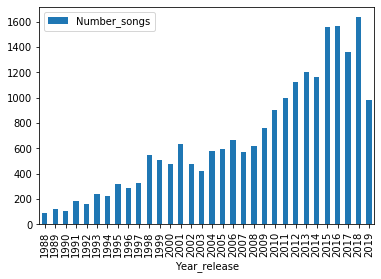

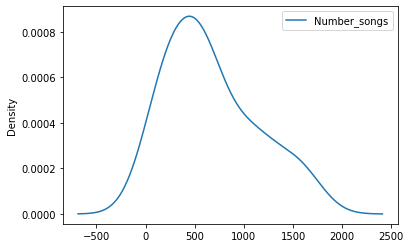

In [49]:
year_df.plot(x='Year_release',y='Number_songs',kind='bar')
year_df.plot(x='Year_release',y='Number_songs',kind='kde')

In [50]:
with open('../Data-Cleaning/year_data.pkl', 'wb') as file:
        pickle.dump(year_df, file)